>[Human Activities Recognition with Smart Phone (Tensorflow)](#scrollTo=2I3wx4Xjw8lZ)

>>[Import Libraries and dataset](#scrollTo=luKZZT--2p_1)

>>[Preprocessing](#scrollTo=agAIVRrK1YjO)

>>[KMeans cluster](#scrollTo=QMjiaaSO-V_d)

>>>[Randomly assign initial clusters](#scrollTo=CYzOoVM1X7JT)

>>>[Assgin each sample to its nearest centroid](#scrollTo=uoJtruHnYTYZ)

>>>[Get new centroids by averaging out the assignment.](#scrollTo=n7_PSZNPYjrm)

>>>[Run the K-means algorithm](#scrollTo=TRTkYNh1XSeg)

>>[Neural Network Model](#scrollTo=iMMU9e4Tfcrd)

>>>[Network Object](#scrollTo=g3vx29ZNuWTN)

>>>[Data Object](#scrollTo=TidZ8CX1ub6T)

>>>[Training object](#scrollTo=OJq26PR9ueu9)



# Human Activities Recognition with Smart Phone (Tensorflow) 

This notebook is created for the tensorflow skill test of [SharpestMinds](https://www.sharpestminds.com/)

Here is my [LinkedIn](https://www.linkedin.com/in/botao-deng-9a632a104/), and I'm open to connection. Feel free to connect, and if you have any question or suggestion with regard to this notebook. Please send me messge or comment below. Thanks.

## Import Libraries and dataset

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pdb
%matplotlib inline

In [0]:
train = pd.read_csv("drive/udacity/human-activity-recognition-with-smartphones/train.csv") # (7352, 563)
test = pd.read_csv("drive/udacity/human-activity-recognition-with-smartphones/test.csv") # (2947, 563)

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


## Preprocessing

Random shuffle the dataset, because the raw dataset have the data from same subject & activities grouped together. 

In [0]:
train = train.sample(frac=1)
test = test.sample(frac=1)

Drop the last two columns:'subject' and 'Activity', the 'Activity' is our target label

In [0]:
Y_train = train.Activity
train = train.drop(['Activity','subject'], axis=1) #(7352, 561)

Y_test = test.Activity
test = test.drop(['Activity','subject'], axis=1) #(2947, 561)

## KMeans cluster

This section of code follows the structure from this [tutorial](http://learningtensorflow.com/lesson6/) with modification. 

In [6]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
1930,0.275602,-0.014378,-0.107078,-0.990957,-0.977243,-0.978142,-0.993393,-0.979388,-0.982505,-0.924358,...,0.096196,-0.053105,-0.506707,-0.089184,-0.149449,-0.113146,-0.520405,-0.563136,-0.153964,-0.153093
6842,0.277710,-0.012810,-0.105801,-0.996945,-0.985843,-0.986607,-0.997060,-0.984664,-0.985520,-0.940076,...,0.160324,-0.648661,-0.891281,-0.121943,0.189055,0.240948,0.300952,-0.741172,0.014104,-0.148676
6609,0.253287,-0.019407,-0.163259,-0.268935,-0.125074,-0.327630,-0.320527,-0.179490,-0.336961,0.138728,...,-0.028307,-0.392197,-0.747373,-0.034108,0.478475,0.882001,-0.360865,-0.544087,0.327879,0.233957
5023,0.449566,-0.025920,-0.091716,0.255458,0.215342,0.248882,0.146518,0.127807,0.178287,0.516075,...,0.418539,-0.326814,-0.636093,-0.801188,0.719251,0.882085,-0.364118,-0.819634,0.157803,0.132478
6248,0.281905,-0.020872,-0.125006,-0.985254,-0.894417,-0.931207,-0.987240,-0.885168,-0.933465,-0.929771,...,-0.013462,0.128510,-0.193418,-0.129315,0.272266,0.471185,-0.530566,-0.772766,0.254949,0.009044


### Randomly assign initial clusters

In [0]:
def generate_initial_centroid(samples, num_cluster):
  '''
  This is the first step of K-means. 
  samples: tensor (num_samples, num_features)
  num_cluster: K, number of clusters.
  
  '''
  num_samples = tf.shape(samples)[0]
  random_indices = tf.random_shuffle(tf.range(0, num_samples))
  centroid_indices = tf.slice(random_indices, [0], [num_cluster])
  init_centroid = tf.gather(samples, centroid_indices)
  
  return init_centroid
  

*Test the initial cluster generating function*

In [8]:
init_test = train.iloc[:1500].values

init_placeholder = tf.placeholder(tf.float32, [1500, 561])
init_res = generate_initial_centroid(init_placeholder, 6)
with tf.Session() as sess:
  init_centroid = sess.run(init_res, feed_dict={init_placeholder:init_test})
  
print("The expected shape is (6, 561) and the generated shape is {0}".format(init_centroid.shape))

The expected shape is (6, 561) and the generated shape is (6, 561)


### Assgin each sample to its nearest centroid

In [9]:
# Check broadcasting rules. 

a = np.array([[[1,2,3],[4,5,6]]]) # (1,2,3) -- (1, num_samples, num_features)
b = np.array([[[1,1,1]],[[4,4,4]]]) # (2,1,3) -- (num_centroids, 1, num_features)
print("The result of a - b is \n{0}".format(a - b))
print("The shape of a - b is {0}".format((a-b).shape))

The result of a - b is 
[[[ 0  1  2]
  [ 3  4  5]]

 [[-3 -2 -1]
  [ 0  1  2]]]
The shape of a - b is (2, 2, 3)


In [0]:
def assign_to_nearest(samples, centroids):
  """
  This function assign each sample to its nearest centroid. 
  samples: tensor, (num_samples, num_features)
  centroids: tensor, (num_centroids, num_features)
  """
  expend_samples = tf.expand_dims(samples, 0) # samples become (1, num_samples, num_features)
  expend_centroid = tf.expand_dims(centroids, 1) # centroid become (num_centroid, 1, num_features)
  
  ## each entry represents how far a sample to a centroid. 
  distances = tf.reduce_sum(tf.square(tf.subtract(expend_samples, expend_centroid)), 2) # distance: (num_centroid, num_samples)
  
  ## which centorid each sample is assigned to. 
  nearest_index = tf.argmin(distances, 0) # nearest_index:(num_samples)
  
  return nearest_index

*Test the assignment function*

In [11]:

assign_samples = tf.constant(np.array([[1,2,3],[4,5,6]]))
assign_centroid = tf.constant(np.array([[1,1,1],[4,4,4]]))
with tf.Session() as sess:
  assign_nearest_index = assign_to_nearest(assign_samples, assign_centroid)
  assign_res = sess.run(assign_nearest_index)

print("The expected output is (0,1), and the actual output is {0}".format(assign_res))
print("The first sample (1,2,3) should be assigned to centroid (1,1,1)")
print("The second sample (4,5,5) should be assigned to centroid (4,4,4)")

The expected output is (0,1), and the actual output is [0 1]
The first sample (1,2,3) should be assigned to centroid (1,1,1)
The second sample (4,5,5) should be assigned to centroid (4,4,4)


### Get new centroids by averaging out the assignment.

In [0]:
def update_centroid(samples, nearest_index, num_clusters):
  """
  samples: tensor, (num_samples, num_features)
  nearest_index: tensor, (num_samples)
  num_clusters: int
  """
  
  nearest_index = tf.to_int32(nearest_index)
  partitions = tf.dynamic_partition(samples, nearest_index, num_clusters)
  new_centroids = tf.concat([tf.reduce_mean(partition, 0, keep_dims=True) for partition in partitions], axis=0)
  
  return new_centroids, nearest_index

*Test the update function*

In [13]:
# Test the function: update_centroid.
with tf.Session() as sess:
  new_cent, _ = update_centroid(assign_samples, assign_res, 2)
  update_res = sess.run(new_cent)
  
print("The expected new centroids are (1,2,3), (4,5,6)")
print("The actual new centroids are \n{0}".format(update_res))

The expected new centroids are (1,2,3), (4,5,6)
The actual new centroids are 
[[1 2 3]
 [4 5 6]]


### Run the K-means algorithm

In [0]:
k_means_placeholder = tf.placeholder(tf.float32, shape=(7352, 561))
updated_centroids = tf.placeholder(tf.float32, shape=(6, 561))

init_centroids = generate_initial_centroid(k_means_placeholder, num_cluster=6)


nearest_index = assign_to_nearest(k_means_placeholder,updated_centroids)
updated_centroid = update_centroid(k_means_placeholder, nearest_index, 6)

with tf.Session() as sess:
  centroids = sess.run(init_centroids, feed_dict={k_means_placeholder:train})
  for i in range(0, 300):
    
    centroids,nearest_index = sess.run(updated_centroid, feed_dict={k_means_placeholder:train,
                                                         updated_centroids:centroids})
    

In [15]:
pd.crosstab(nearest_index, Y_train)

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
row_0,,,,,,
0,10,1,0,839,253,912
1,2,417,597,0,0,0
2,0,810,777,0,0,0
3,633,15,0,0,0,0
4,0,0,0,387,733,161
5,762,43,0,0,0,0


Take out message:

1) We can see that basically walking activities are separated out from the passive activities. Cluster 0 and Cluster 3 are filled with walking activities, while the rest clusters represent the passive activities. 

2) Cluster 0 has more 'walking' and 'walking upstairs' in it, while majority of samples of cluster 3 are 'walking downstairs'. That means 'walking downstairs' are easier to separate out from the other two, while the 'walking' and 'walking upstair' are very easy to get mixed.

3) Cluster 2 and 5 are filled with 'laying', and cluster 1 and 4 are filled with sitting and standing. Laying is clearly easier to distinguished from the other two. And it seems that k-means algorithm has difficulites identifying sitting and standing. 

## Neural Network Model

One-hot encoded our target label

In [0]:
Y_train = pd.get_dummies(Y_train)
Y_test = pd.get_dummies(Y_test)

In [0]:
train = train.as_matrix()
test = test.as_matrix()

Y_train = Y_train.as_matrix()
Y_test = Y_test.as_matrix()

In [0]:
FEATURE_DIM = 561
LEARNING_RATE = 0.001
LABEL_DIM = 6
BATCH_SIZE = 64
NUM_EPOCH = 100

The code below follows the structure from SharpestMinds. Click [here](https://drive.google.com/file/d/0B1I9rUbcvFQTd0twUXZXcWRjajA/view) for original code.  

### Network Object

In [0]:
class Neural_Network():
  
  def __init__(self, feature_dim = FEATURE_DIM, label_dim = LABEL_DIM):
    self.feature_dim = feature_dim
    self.label_dim = label_dim
    
    
  def build_network(self, learning_rate=LEARNING_RATE):
    
    self.train_X = tf.placeholder(tf.float32, [None, self.feature_dim])
    self.train_Y = tf.placeholder(tf.float32, [None, self.label_dim])
    
    self.layer_1 = self.dense_layer(self.train_X, self.feature_dim, 
                                    1024, activation=tf.nn.relu, name='layer_1')
    self.layer_2 = self.dense_layer(self.layer_1, 1024, 512, 
                                   activation=tf.nn.relu, name='layer_2')
    self.layer_3 = self.dense_layer(self.layer_2, 512, 64, 
                                   activation=tf.nn.relu, name='layer_3')
    self.output = self.dense_layer(self.layer_3, 64, 6, name='output')
    
    self.loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits=self.output, labels = self.train_Y))
    
    self.optimizer = tf.train.AdamOptimizer(learning_rate)
    
    self.train_step = self.optimizer.minimize(self.loss)
    
    self.accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(self.output,1), 
                                                    tf.argmax(self.train_Y, 1)),'float'))
    
  def dense_layer(self, inputs, input_size, output_size, name, activation=None):
    
    W = tf.get_variable(name=name+'_w',shape=(input_size, output_size), 
                        initializer=tf.contrib.layers.xavier_initializer())
    b = tf.get_variable(name=name+'_b', shape=(output_size))
    out = tf.matmul(inputs, W) + b
    
    if activation:
      return activation(out)
    else:
      return out
    

### Data Object

In [0]:
class Data():
  
  def __init__(self, train_X, train_Y, batch_size=BATCH_SIZE):
    
    self.train_X = train_X
    self.train_Y = train_Y
    self.batch_size = batch_size
    self.num_batch = self.train_X.shape[0]//batch_size
    
  def generate_batch(self):
    
    for i in range(self.num_batch):
      
      x = self.train_X[(i*self.batch_size):(i+1)*self.batch_size, :]
      y = self.train_Y[(i*self.batch_size):(i+1)*self.batch_size]
      
      yield x, y 
    

### Training object

In [0]:
class Learn():
  
  def __init__(self, train_X, train_Y, test_X, test_Y, 
               batch_size=BATCH_SIZE, epoch = NUM_EPOCH):
    
    self.batch_size = batch_size
    self.epoch = epoch
    
    self.network = Neural_Network()
    self.network.build_network(learning_rate=0.001)
    self.data = Data(train_X, train_Y, self.batch_size)
    self.test_X = test_X
    self.test_Y = test_Y
  
  def run_training(self):
    init = tf.initialize_all_variables()
    
    with tf.Session() as sess:
      
      sess.run(init)
      
      training_loss = []
      counter, tmp_loss = 0, 0
      
      for i in range(self.epoch):
        
        for x, y in self.data.generate_batch():
          
          feed_dict = {self.network.train_X:x, self.network.train_Y:y}
        
          _, loss = sess.run([self.network.train_step, self.network.loss], 
                             feed_dict=feed_dict)
          
          if counter % 100 == 0 and counter!=0:
            training_loss.append(tmp_loss/100)
            tmp_loss = 0
          else:
            tmp_loss += loss
            
          counter += 1
          
        print("Epoch {0}, loss is {1}".format(i, loss))
        
        
        
      self.training_loss = training_loss
      acc = sess.run([self.network.accuracy], feed_dict={self.network.train_X:self.test_X,
                                                        self.network.train_Y:self.test_Y})
      print("The testing accuracy is {0}".format(acc))
      
  def plot_training_loss(self):
    plt.plot(self.training_loss)

Epoch 0, loss is 0.04274725168943405
Epoch 1, loss is 0.014772896654903889
Epoch 2, loss is 0.024817435070872307
Epoch 3, loss is 0.015166966244578362
Epoch 4, loss is 0.010252430103719234
Epoch 5, loss is 0.020412592217326164
Epoch 6, loss is 0.011007190681993961
Epoch 7, loss is 0.00807555764913559
Epoch 8, loss is 0.00535543542355299
Epoch 9, loss is 0.005216964054852724
Epoch 10, loss is 0.006236440036445856
Epoch 11, loss is 0.004788061138242483
Epoch 12, loss is 0.010969987139105797
Epoch 13, loss is 0.013738912530243397
Epoch 14, loss is 0.006589491385966539
Epoch 15, loss is 0.009455681778490543
Epoch 16, loss is 0.00981119740754366
Epoch 17, loss is 0.019594501703977585
Epoch 18, loss is 0.016192784532904625
Epoch 19, loss is 0.023676488548517227
Epoch 20, loss is 0.002159376861527562
Epoch 21, loss is 0.001554011134430766
Epoch 22, loss is 0.0019703134894371033
Epoch 23, loss is 0.0019959122873842716
Epoch 24, loss is 0.001144260517321527
Epoch 25, loss is 0.00193609646521508

Epoch 71, loss is 0.0013062726939097047
Epoch 72, loss is 0.004179016221314669
Epoch 73, loss is 0.0013593996409326792
Epoch 74, loss is 0.0022848444059491158
Epoch 75, loss is 0.005721396300941706
Epoch 76, loss is 0.004467704799026251
Epoch 77, loss is 0.0030231191776692867
Epoch 78, loss is 0.06440088152885437
Epoch 79, loss is 0.004833477083593607
Epoch 80, loss is 0.0009715980850160122
Epoch 81, loss is 0.0036467646714299917
Epoch 82, loss is 0.002790809143334627
Epoch 83, loss is 0.003491627750918269
Epoch 84, loss is 0.004027544055134058
Epoch 85, loss is 0.0028718665707856417
Epoch 86, loss is 0.006469701416790485
Epoch 87, loss is 0.013829212635755539
Epoch 88, loss is 0.0026772317942231894
Epoch 89, loss is 0.0006333438213914633
Epoch 90, loss is 0.0024947889614850283
Epoch 91, loss is 0.0013173514744266868
Epoch 92, loss is 0.0031941935885697603
Epoch 93, loss is 0.002052722964435816
Epoch 94, loss is 0.011920716613531113
Epoch 95, loss is 0.0314619354903698
Epoch 96, loss i

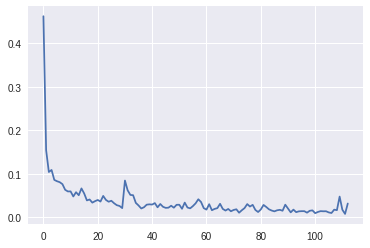

In [186]:
tf.reset_default_graph()

learner = Learn(train, Y_train, test, Y_test, epoch=NUM_EPOCH)
learner.run_training()
learner.plot_training_loss()